## Artifacts Shipping Price Prediciton
Hackerearth <br>
Date : 24.02.2021
<br>
https://www.hackerearth.com/challenges/competitive/hackerearth-machine-learning-challenge-predict-shipping-cost/
#### Basic Model 1.0

WORKFLOW <br>
> Get Delay <br>
Categorical NaN -> 'not specified' <br>
Numerical NaN -> Mode <br>
One-Hot Encoding <br>
Normalize <br>
RandomForrestRegressor

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

###### PREPROCESSING  
- Missing Categorical Values :  Replaced with 'Not Specified' or Mode[0]
- Missing Numerical Values :  Replaced with Mean

In [3]:
train = pd.read_csv("dataset/train.csv")
test = pd.read_csv("dataset/test.csv")

In [4]:
# Removing the predicting column

train_Y = train['Cost'].abs()
train_X = train.drop(['Cost'], axis=1)
test_X = test

Customer Id          Artist Name  Artist Reputation  Height  \
0     fffe3900350033003300        Billy Jenkins               0.26    17.0   
1     fffe3800330031003900          Jean Bryant               0.28     3.0   
2     fffe3600370035003100         Laura Miller               0.07     8.0   
3         fffe350031003300       Robert Chaires               0.12     9.0   
4     fffe3900320038003400         Rosalyn Krol               0.15    17.0   
...                    ...                  ...                ...     ...   
6495  fffe3800370037003300  Jeffrey Freudenthal               0.37    37.0   
6496      fffe310036003400        Larry Edwards               0.67    15.0   
6497  fffe3600300031003300         Denise Worth               0.68    19.0   
6498  fffe3600350035003900          Daniel Drew               0.02    33.0   
6499  fffe3700310031003600       Vernon Carroll               0.18    30.0   

      Width     Weight   Material  Price Of Sculpture  Base Shipping Price  \
0       6.0     4128.0      Brass               13.91                16.27   
1       3.0       61.0      Brass                6.83                15.00   
2       5.0      237.0       Clay                4.96                21.18   
3       NaN        NaN  Aluminium                5.81                16.31   
4       6.0      324.0  Aluminium                3.18                11.94   
...     ...        ...        ...                 ...                  ...   
6495   10.0    16551.0      Brass               28.28                38.46   
6496    NaN    18981.0        NaN               67.18                27.72   
6497    8.0      587.0       Clay                6.92                10.38   
6498    9.0  1269377.0      Stone             2929.13                69.76   
6499   13.0    34729.0      Brass               46.63                78.25   

     International Express Shipment Installation Included Transport Fragile  \
0              Yes              Yes                    No   Airways      No   
1               No               No                    No  Roadways      No   
2               No               No                    No  Roadways     Yes   
3               No               No                    No       NaN      No   
4              Yes              Yes                   Yes   Airways      No   
...            ...              ...                   ...       ...     ...   
6495           Yes              Yes                    No   Airways      No   
6496            No               No                    No  Roadways      No   
6497           Yes               No                    No       NaN     Yes   
6498            No              Yes                    No  Roadways      No   
6499            No              Yes                    No   Airways      No   

     Customer Information Remote Location Scheduled Date Delivery Date  \
0           Working Class              No       06/07/15      06/03/15   
1           Working Class              No       03/06/17      03/05/17   
2           Working Class             Yes       03/09/15      03/08/15   
3                 Wealthy             Yes       05/24/15      05/20/15   
4           Working Class              No       12/18/16      12/14/16   
...                   ...             ...            ...           ...   
6495              Wealthy             Yes       03/28/18      03/25/18   
6496        Working Class              No       08/29/15      08/27/15   
6497              Wealthy              No       04/10/19      04/09/19   
6498        Working Class             Yes       03/10/19      03/12/19   
6499        Working Class              No       12/03/16      12/05/16   

              Customer Location  
0        New Michelle, OH 50777  
1     New Michaelport, WY 12072  
2         Bowmanshire, WA 19241  
3          East Robyn, KY 86375  
4           Aprilside, PA 52793  
...                         ...  
6495       New Robert, VT 85335  
6496       New Joshua, VA 35766

In [98]:
# Pandas profiling

import pandas_profiling 
train.profile_report()

Summarize dataset:   0%|          | 0/33 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
# check for delivery delays

train_X['Scheduled Date'] = pd.to_datetime(train_X['Scheduled Date'], format='%m/%d/%y')
train_X['Delivery Date'] = pd.to_datetime(train_X['Delivery Date'], format='%m/%d/%y')
test_X['Scheduled Date'] = pd.to_datetime(test_X['Scheduled Date'], format='%m/%d/%y')
test_X['Delivery Date'] = pd.to_datetime(test_X['Delivery Date'], format='%m/%d/%y')

In [47]:
delay = (train_X['Scheduled Date']-train_X['Delivery Date']).dt.days
train_X['Delay'] = np.where( delay > 0, 0, 1)
delay = (test_X['Scheduled Date']-test_X['Delivery Date']).dt.days
test_X['Delay'] = np.where( delay > 0 , 0, 1 )
del delay

In [66]:
# train_X['Transport'].value_counts()/train_X.shape[0]
train_X['Transport'] = train_X['Transport'].fillna('Not Specified')
test_X['Transport'] = test_X['Transport'].fillna('Not Specified')

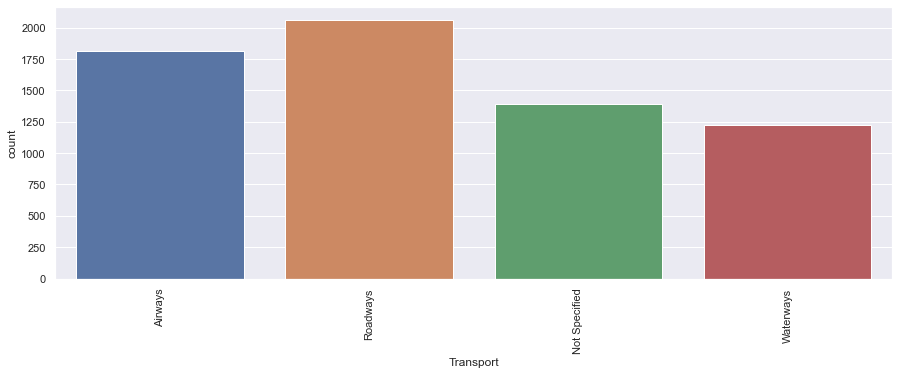

In [64]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=train_X['Transport']);

In [61]:
train_X = train_X.drop(['Customer Id', 'Artist Name', 'Scheduled Date', 'Delivery Date', 'Customer Location'], axis = 1)
test_X = test.drop(['Customer Id', 'Artist Name', 'Scheduled Date', 'Delivery Date', 'Customer Location'], axis = 1)

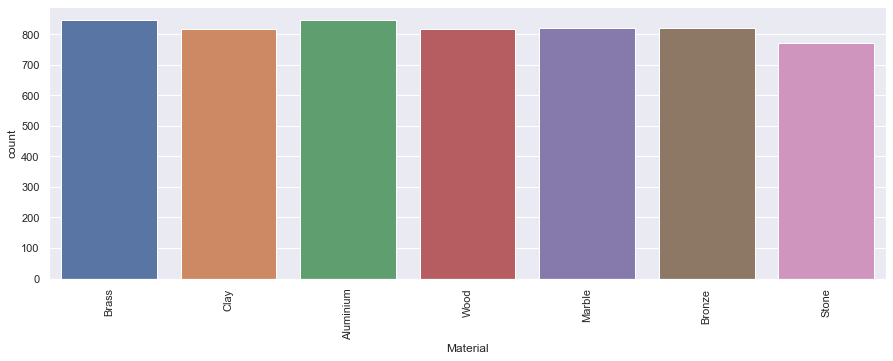

In [65]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=train_X['Material']);

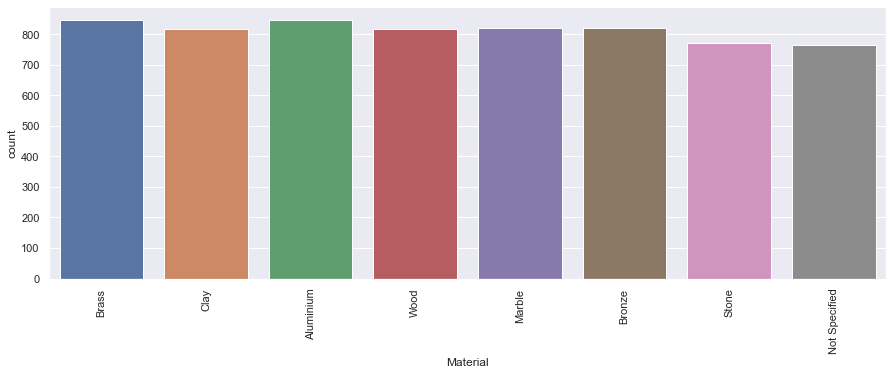

In [67]:
train_X['Material'] = train_X['Material'].fillna('Not Specified')
test_X['Material'] = test_X['Material'].fillna('Not Specified')
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=train_X['Material']);

In [ ]:
# Imputing Missing values

In [62]:
print('Train shape : {}'.format(train_X.shape))
print('Test shape : {}'.format(test_X.shape))

Train shape : (6500, 15)
Test shape : (3500, 15)


In [68]:
train_X.isnull().sum()

Artist Reputation        750
Height                   375
Width                    584
Weight                   587
Material                   0
Price Of Sculpture         0
Base Shipping Price        0
International              0
Express Shipment           0
Installation Included      0
Transport                  0
Fragile                    0
Customer Information       0
Remote Location          771
Delay                      0
dtype: int64

In [69]:
#1. Function to replace NAN values with mode value
def impute_nan_most_frequent_category(DataFrame,ColName):
    # .mode()[0] - gives first category name
     most_frequent_category=DataFrame[ColName].mode()[0]
    
    # replace nan values with most occured category
     DataFrame[ColName + "_Imputed"] = DataFrame[ColName]
     DataFrame[ColName + "_Imputed"].fillna(most_frequent_category,inplace=True)
    
#2. Call function to impute most occured category
for Columns in ['Remote Location']:
    impute_nan_most_frequent_category(train_X,Columns)
    impute_nan_most_frequent_category(test_X,Columns)
    
train_X = train_X.drop(['Remote Location'], axis = 1)
test_X = test_X.drop(['Remote Location'], axis = 1)

In [70]:
# Get list of categorical variables
s = (train_X.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location_Imputed']


In [74]:
# One Hot Encoding Manually (Test & Train)

train_X = pd.concat([train_X, pd.get_dummies(train_X['Material'], prefix='Material')],axis=1)
train_X = pd.concat([train_X, pd.get_dummies(train_X['International'], prefix='International')],axis=1)
train_X = pd.concat([train_X, pd.get_dummies(train_X['Express Shipment'], prefix='Express')],axis=1)
train_X = pd.concat([train_X, pd.get_dummies(train_X['Installation Included'], prefix='Installation')],axis=1)
train_X = pd.concat([train_X, pd.get_dummies(train_X['Transport'], prefix='Transport')],axis=1)
train_X = pd.concat([train_X, pd.get_dummies(train_X['Fragile'], prefix='Fragile')],axis=1)
train_X = pd.concat([train_X, pd.get_dummies(train_X['Customer Information'], prefix='Customer')],axis=1)
train_X = pd.concat([train_X, pd.get_dummies(train_X['Remote Location_Imputed'], prefix='Remote_loc')],axis=1)

test_X = pd.concat([test_X, pd.get_dummies(test_X['Material'], prefix='Material')],axis=1)
test_X = pd.concat([test_X, pd.get_dummies(test_X['International'], prefix='International')],axis=1)
test_X = pd.concat([test_X, pd.get_dummies(test_X['Express Shipment'], prefix='Express')],axis=1)
test_X = pd.concat([test_X, pd.get_dummies(test_X['Installation Included'], prefix='Installation')],axis=1)
test_X = pd.concat([test_X, pd.get_dummies(test_X['Transport'], prefix='Transport')],axis=1)
test_X = pd.concat([test_X, pd.get_dummies(test_X['Fragile'], prefix='Fragile')],axis=1)
test_X = pd.concat([test_X, pd.get_dummies(test_X['Customer Information'], prefix='Customer')],axis=1)
test_X = pd.concat([test_X, pd.get_dummies(test_X['Remote Location_Imputed'], prefix='Remote_loc')],axis=1)

train_X = train_X.drop(['Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location_Imputed'],axis=1)
test_X = test_X.drop(['Material', 'International', 'Express Shipment', 'Installation Included', 'Transport', 'Fragile', 'Customer Information', 'Remote Location_Imputed'],axis=1)

In [76]:
# Get missing columns in the training test
missing_cols = set( train_X.columns ) - set( test_X.columns )

# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_X[c] = 0

In [77]:
print('Train shape : {}'.format(train_X.shape))
print('Test shape : {}'.format(test_X.shape))

Train shape : (6500, 31)
Test shape : (3500, 31)


In [79]:
train_X.columns

Index(['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture',
       'Base Shipping Price', 'Delay', 'Material_Aluminium', 'Material_Brass',
       'Material_Bronze', 'Material_Clay', 'Material_Marble',
       'Material_Not Specified', 'Material_Stone', 'Material_Wood',
       'International_No', 'International_Yes', 'Express_No', 'Express_Yes',
       'Installation_No', 'Installation_Yes', 'Transport_Airways',
       'Transport_Not Specified', 'Transport_Roadways', 'Transport_Waterways',
       'Fragile_No', 'Fragile_Yes', 'Customer_Wealthy',
       'Customer_Working Class', 'Remote_loc_No', 'Remote_loc_Yes'],
      dtype='object')

In [81]:
test_X.columns

Index(['Artist Reputation', 'Height', 'Width', 'Weight', 'Price Of Sculpture',
       'Base Shipping Price', 'Delay', 'Material_Aluminium', 'Material_Brass',
       'Material_Bronze', 'Material_Clay', 'Material_Marble', 'Material_Stone',
       'Material_Wood', 'International_No', 'International_Yes', 'Express_No',
       'Express_Yes', 'Installation_No', 'Installation_Yes',
       'Transport_Airways', 'Transport_Not Specified', 'Transport_Roadways',
       'Transport_Waterways', 'Fragile_No', 'Fragile_Yes', 'Customer_Wealthy',
       'Customer_Working Class', 'Remote_loc_No', 'Remote_loc_Yes',
       'Material_Not Specified'],
      dtype='object')

In [82]:
test_X.head()

Artist Reputation  Height  Width  Weight  Price Of Sculpture  \
0               0.35    53.0   18.0   871.0                5.98   
1               0.67     7.0    4.0   108.0                6.92   
2               0.61     6.0    5.0    97.0                4.23   
3               0.14    15.0    8.0   757.0                6.28   
4               0.63    10.0    4.0  1673.0                4.39   

   Base Shipping Price  Delay  Material_Aluminium  Material_Brass  \
0                19.11      1                   0               0   
1                13.96      1                   0               0   
2                13.62      1                   1               0   
3                23.79      1                   0               0   
4                17.83      0                   0               0   

   Material_Bronze  ...  Transport_Not Specified  Transport_Roadways  \
0                0  ...                        0                   0   
1                0  ...                        0                   1   
2                0  ...                        0                   0   
3                0  ...                        0                   1   
4                0  ...                        0                   1   

   Transport_Waterways  Fragile_No  Fragile_Yes  Customer_Wealthy  \
0                    0           1            0                 0   
1                    0           0            1                 0   
2                    0           1            0                 0   
3                    0           0            1                 1   
4                    0           1            0                 0   

   Customer_Working Class  Remote_loc_No  Remote_loc_Yes  \
0                       1              1               0   
1                       1              1               0   
2                       1              1               0   
3                       0              1               0   
4                       1              0               1   

   Material_Not Specified  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0  

[5 rows x 31 columns]

In [83]:
# Perform after one hot encoding 
# Only numerical values are allowed in the dataframe for iterative impute to work

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp_mean = IterativeImputer(random_state=0)
imp_mean.fit(train_X)

train_X = pd.DataFrame(imp_mean.transform(train_X),columns = train_X.columns)
test_X = pd.DataFrame(imp_mean.transform(test_X),columns = train_X.columns)

In [84]:
train_X.isnull().sum()

Artist Reputation          0
Height                     0
Width                      0
Weight                     0
Price Of Sculpture         0
Base Shipping Price        0
Delay                      0
Material_Aluminium         0
Material_Brass             0
Material_Bronze            0
Material_Clay              0
Material_Marble            0
Material_Not Specified     0
Material_Stone             0
Material_Wood              0
International_No           0
International_Yes          0
Express_No                 0
Express_Yes                0
Installation_No            0
Installation_Yes           0
Transport_Airways          0
Transport_Not Specified    0
Transport_Roadways         0
Transport_Waterways        0
Fragile_No                 0
Fragile_Yes                0
Customer_Wealthy           0
Customer_Working Class     0
Remote_loc_No              0
Remote_loc_Yes             0
dtype: int64

In [85]:
test_X.isnull().sum()

Artist Reputation          0
Height                     0
Width                      0
Weight                     0
Price Of Sculpture         0
Base Shipping Price        0
Delay                      0
Material_Aluminium         0
Material_Brass             0
Material_Bronze            0
Material_Clay              0
Material_Marble            0
Material_Not Specified     0
Material_Stone             0
Material_Wood              0
International_No           0
International_Yes          0
Express_No                 0
Express_Yes                0
Installation_No            0
Installation_Yes           0
Transport_Airways          0
Transport_Not Specified    0
Transport_Roadways         0
Transport_Waterways        0
Fragile_No                 0
Fragile_Yes                0
Customer_Wealthy           0
Customer_Working Class     0
Remote_loc_No              0
Remote_loc_Yes             0
dtype: int64

###### Data Normalization

In [87]:
import sklearn
scaler = sklearn.preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(train_X), columns=train_X.columns)
X_test = pd.DataFrame(scaler.transform(test_X), columns=test_X.columns)

###### Processed Data
Training Dataset : X_train, train_Y <br>
Testing Dataset : X_test

###### RandomForrestRegressor

In [88]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, train_Y)

RandomForestRegressor(random_state=42)

In [89]:
y_prediction_rf = rf.predict(X_test)
y_prediction_rf

array([   274.5185,    290.5866,    208.6561, ...,   1677.1539,
          263.2525, 162977.4676])

> GridSearch Not Necessarily Needed

In [90]:
# Turing RF
# Gridsearch of Hyperparameters

#from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = [
{'n_estimators': [50,100,250,500], 
 'max_depth': [10, 50, 100], 'bootstrap': [True, False]}
]

In [91]:
random_search_forest = RandomizedSearchCV(rf, param_grid, cv=10)
random_search_forest.fit(X_train, train_Y)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': [10, 50, 100],
                                         'n_estimators': [50, 100, 250, 500]}])

In [92]:
# Best search Result

tuned_rf_best_random = random_search_forest.best_estimator_
tuned_rf_best_random

RandomForestRegressor(max_depth=100, random_state=42)

In [93]:
# Fitting the model again with the searched best parameters

tuned_rf_best_random.fit(X_train, train_Y)
tuned_rf_random_pred = tuned_rf_best_random.predict(X_test)

In [94]:
# Predictions
tuned_rf_random_pred

array([   274.5185,    290.5866,    208.6561, ...,   1677.1539,
          263.2525, 162977.4676])

> Submision

In [95]:
# Submission Formatting 

df = pd.DataFrame()
df['Customer Id'] = test['Customer Id']
df['Cost'] = y_prediction_rf
df['Cost'] = df['Cost'].abs()
df.head(10)

Customer Id       Cost
0  fffe3400310033003300   274.5185
1  fffe3600350035003400   290.5866
2  fffe3700360030003500   208.6561
3      fffe350038003600   179.3887
4  fffe3500390032003500   307.1784
5  fffe3900360034003300   285.4659
6  fffe3200380034003700   612.8659
7  fffe3900370035003200  1054.0680
8  fffe3100380039003200   639.2167
9  fffe3300330036003800   191.4382

In [96]:
# Saving to csv file for submission

df.to_csv('prediction1.csv', index = False)